# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 9 </span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Date $n$ città, il problema del commesso viaggiatore (TSP) consiste nel trovare il percorso ad anello con distanza minima che permetta di attraversare tutte le città un'unica volta. Il problema è quindi un problema di ottimizzazione combinatoria (discreto e finito), in cui la soluzione migliore va identificata in un set finito, avente $(n-1)!/2$ membri, di soluzioni possibili. La funzione costo da minimizzare è quindi la distanza dell'anello ed i vincoli da rispettare sono che le città vengano attraversate tutte ed un'unica volta.

L'esercizio richiede di scrivere un codice per risolvere il problema del commesso viaggiatore, esplorando _$ncity=34$ città, tramite un algoritmo genetico (GA). 

Gli algoritmi genetici sono algoritmi di ottimizzazione, del tipo $\textit{nature-inspired}$, metaeuristici. Essi permettono di esplorare ampi spazi di soluzioni e possono trovare soluzioni vicine al minimo globale, evitando di rimanere intrappolati in minimi locali. Inoltre, l'uso di $\textit{crossover}$ e mutazioni permette un buon equilibrio tra esplorazione di nuove soluzioni (diversificazione) e sfruttamento delle soluzioni già note ritenute buone (intensificazione). Queste caratteristiche li rendono una potente strategia di ottimizzazione per il TSP.

Un concetto chiave negli algoritmi genetici è quello dei "$\textit{building blocks}$". Questi sono schemi, o combinazioni di bit, che rappresentano soluzioni parziali altamente adattive. Durante l'evoluzione della popolazione, i building blocks di alta qualità vengono combinati e ricombinati attraverso le operazioni di crossover e mutazione. Questo processo favorisce la creazione di soluzioni migliori, poiché i building blocks di successo tendono a essere propagati nelle generazioni successive. In tal modo, gli algoritmi genetici sfruttano efficacemente le strutture delle soluzioni parziali per costruire soluzioni globali ottimali.

Riepilogo qui le proprietà principali del mio codice:
- Ciascun percorso è salvato in una struct "individual":

  ```cpp
  struct individual {
	int _ncity;         // Numero di città totale
	double _distance;   // Distanza associata al percorso
	ivec _chromosome;   // Vettore di interi che tiene conto dell'ordine delle città (percorso)
     
    // Metodi [...]
     }
     
- Ho scritto una classe GA con i membri e i metodi necessari ad implementare l'algoritmo vero e proprio. La mia popolazione consiste in:
  ```cpp
  field <individual> _population; 


  
- La mia popolazione consiste di $\_npopulation=1000$ individui, che ho generato ricorsivamente, partendo dall'individuo ordinato (1,2,3,...,34), applicando _ncity/2 permutazioni sull'individuo immediatamente precedente generato;
- Ordino la popolazione in base ad $L^{(2)}$ crescente;
- Genero la nuova generazione, rimpiazzando completamente quella precedente ($\textit{Solutions Generational}$ GA), attraverso:
  - $\textit{Operatore di selezione}$ definito come:
    $$ \text{int}\left(\frac{\_npopulation-1}{0.5^{10}} \cdot (r-0.5)^{10} \right), r \in(0,1) \text{ random}
    $$
    così da selezionare più probabilmente come genitori individui più performanti;
  - $\textit{Operatore di crossover}$, chiamato con probabilità $p_{c}=0.85$, tale che:
    - venga estratto un indice $\textit{num} \in (1/5 \_ncity, 4/5 \_ncity)$;
    - il primo figlio sia una copia del primo genitore dall'indice 0 fino all'indice $\textit{num}$, mentre gli indici successivi siano riempiti dalle città rimanenti, nell'ordine in cui compaiono nel secondo genitore;
    - idem per il secondo figlio, con i genitori invertiti;
  - $\textit{Mutazioni}$, chiamate con probabilità $m_{i}<0.2$:
    - quelle suggerite nella consegna dell'esercizio.
- Itero il codice per un numero fissato di generazioni (avrei però potuto monitorare $\textit{runtime}$ la funzione costo in modo da terminare la simulazione una volta verificata la convergenza).
  
Nota: i valori di $p_{c}$ ed $m_{i}$ sono stati ottimizzati in modo da velocizzare la convergenza dell'algoritmo.

L'esercizio richiede di testare l'algoritmo su città estratte lungo una circonferenza e su città estratte all'interno di un quadrato.

#### Città su circonferenza

Ho visualizzato le città estratte e le ho collegate secondo l'ordine invividuato dall'algoritmo: il percorso segue  la circonferenza.

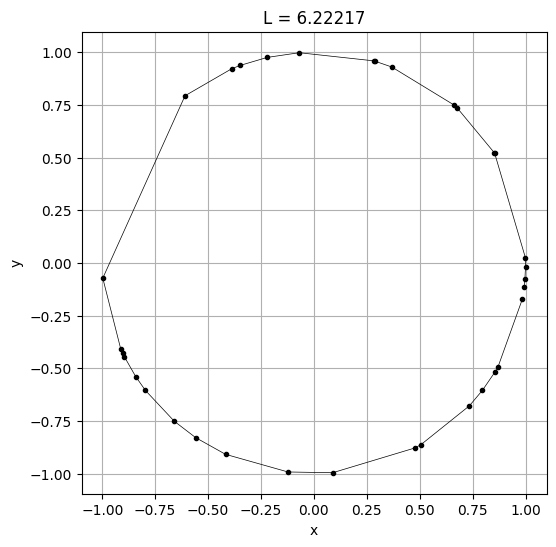

In [2]:
# Carica i dati dal file "City_positions_circ.dat"
data = np.loadtxt("OUTPUT/City_positions_circ.dat")

# Estrai le colonne di interesse
indici = data[:, 0]
coordinate_x = data[:, 1]
coordinate_y = data[:, 2]

order_and_distance = np.loadtxt("OUTPUT/Best_path_circonferenza.dat")
order = order_and_distance [:34]
distance = order_and_distance[-1]

x_coords_ordered = [coordinate_x[int(i - 1)] for i in order]
y_coords_ordered = [coordinate_y[int(i - 1)] for i in order]

# Crea il grafico
plt.figure(figsize=(6, 6))
plt.plot(x_coords_ordered, y_coords_ordered, marker='o', linestyle='-', color='black', linewidth=0.5, markersize=3)
plt.title(f'L = {distance}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Mostra il grafico
plt.show()

Ho visualizzato, nel primo grafico, l'andamento della distanza del percorso migliore all'evolvere delle generazioni: l'algoritmo sembra riuscire a convergere al percorso migliore in meno di 50 generazioni, svincolandosi dai primi minimi locali trovati.

Nel secondo grafico è visualizzata la media delle distanze della metà migliore della popolazione all'evolvere delle generazioni. L'andamento riflette, con delle ovvie oscillazioni, l'andamento del primo grafico, indicando che gli individui della metà migliore della popolazione poco si discostano dall'inidividuo migliore.

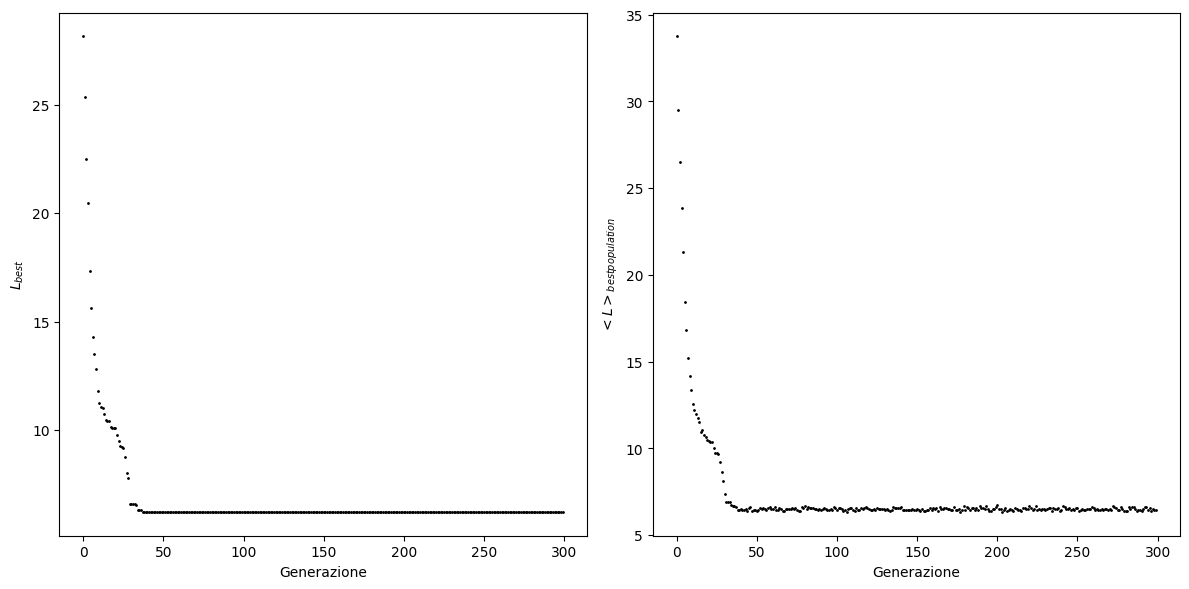

In [3]:
# Carica i dati da "Misure.dat"
data = np.loadtxt("OUTPUT/Misure_circonferenza.dat")

# Estrai le colonne di interesse
colonna1 = data[:300, 0]
colonna2 = data[:300, 1]
colonna3 = data[:300, 2]

# Crea la figura e i subplot orizzontali
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot del primo subplot
ax1.plot(colonna1, colonna2, marker='o', markersize=1, linestyle='', color='black')
ax1.set_title('')
ax1.set_xlabel('Generazione')
ax1.set_ylabel('$L_{best}$')

# Plot del secondo subplot
ax2.plot(colonna1, colonna3, marker='o', color='black', linestyle='', markersize=1)
ax2.set_title('')
ax2.set_xlabel('Generazione')
ax2.set_ylabel('$<L>_{best population}$')

# Mostra il grafico
plt.tight_layout()
plt.show()


#### Città entro un quadrato

Ho visualizzato le città estratte e le ho collegate secondo l'ordine invividuato dall'algoritmo: il percorso non presenta incroci, perciò il risultato può considerarsi buono. Non posso comunque essere certa che il percorso trovato sia il minimo assoluto ricercato.

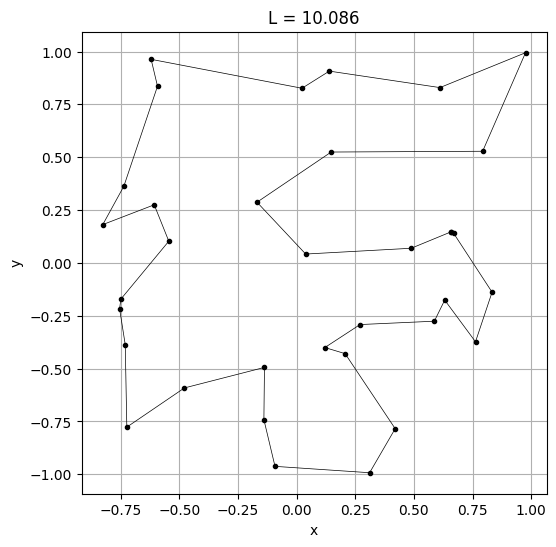

In [4]:
# Carica i dati dal file "City_positions_square.dat"
data = np.loadtxt("OUTPUT/City_positions_square.dat")

# Estrai le colonne di interesse
indici = data[:, 0]
coordinate_x = data[:, 1]
coordinate_y = data[:, 2]

order_and_distance = np.loadtxt("OUTPUT/Best_path_quadrato.dat")
order = order_and_distance[:34]
distance = order_and_distance[-1]

x_coords_ordered = [coordinate_x[int(i - 1)] for i in order]
y_coords_ordered = [coordinate_y[int(i - 1)] for i in order]

# Aggiungi il primo punto alla fine per chiudere il percorso
x_coords_ordered.append(x_coords_ordered[0])
y_coords_ordered.append(y_coords_ordered[0])

# Crea il grafico
plt.figure(figsize=(6, 6))
plt.plot(x_coords_ordered, y_coords_ordered, marker='o', linestyle='-', color='black', linewidth=0.5, markersize=3)
plt.title(f'L = {distance}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Mostra il grafico
plt.show()

Anche in questo caso, nel primo grafico, è visualizzato l'andamento della distanza del percorso migliore all'evolvere delle generazioni. L'algoritmo sembra riuscire a convergere al percorso migliore in meno di 100 generazioni, svincolandosi dai primi minimi locali trovati.

Nel secondo grafico è visualizzata la media delle distanze della metà migliore della popolazione all'evolvere delle generazioni. L'andamento riflette, con delle ovvie oscillazioni, l'andamento del primo grafico, indicando che gli individui della metà migliore della popolazione poco si discostano dall'inidividuo migliore.

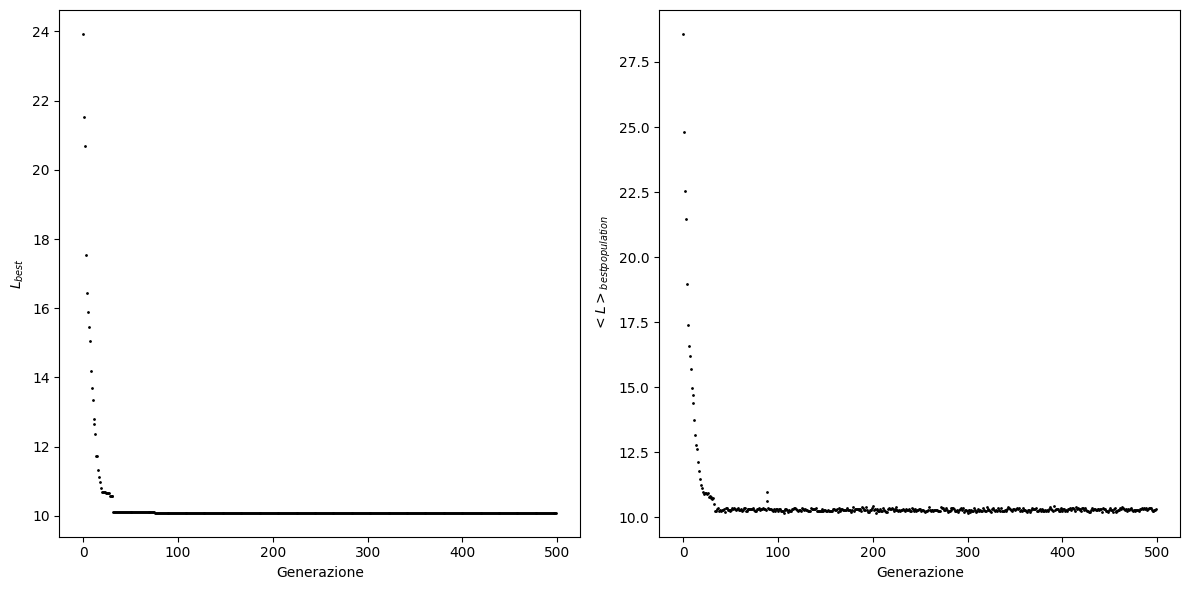

In [44]:
# Carica i dati da "Misure.dat"
data = np.loadtxt("Misure_quadrato.dat")

# Estrai le colonne di interesse
colonna1 = data[:500, 0]
colonna2 = data[:500, 1]
colonna3 = data[:500, 2]

# Crea la figura e i subplot orizzontali
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot del primo subplot
ax1.plot(colonna1, colonna2, marker='o', markersize=1, linestyle='', color='black')
ax1.set_title('')
ax1.set_xlabel('Generazione')
ax1.set_ylabel('$L_{best}$')

# Plot del secondo subplot
ax2.plot(colonna1, colonna3, marker='o', color='black', linestyle='', markersize=1)
ax2.set_title('')
ax2.set_xlabel('Generazione')
ax2.set_ylabel('$<L>_{best population}$')

# Mostra il grafico
plt.tight_layout()
plt.show()
